In [12]:
import pandas as pd 
import requests
from bs4 import BeautifulSoup
import tqdm
import evaluate
import matplotlib.pyplot as plt

In [13]:
import pandas as pd 

In [14]:
valid = pd.read_csv('../dev_baseline.csv')
valid

,ID,text,target,url,date,pred_target
0,ynat-v1_train_02602,나태주 너를 먼저 생각한다면 미투 나올 일 없겠죠,2,https://news.naver.com/main/read.nhn?mode=LS2D...,2018.02.18. 오전 10:10,2
1,ynat-v1_train_00964,손학규 曺 임명은 정권위기로 연결…지명철회 촉구,6,https://news.naver.com/main/read.nhn?mode=LS2D...,2019.09.09. 오전 10:22,6
2,ynat-v1_train_02893,北 청년동맹 70돌 행사 연일보도…대북제재 겨냥 체제결속,6,https://news.naver.com/main/read.nhn?mode=LS2D...,2016.01.14. 오전 10:06,6
3,ynat-v1_train_03318,가장 순수한 춤…서울국제즉흥춤축제 24일 개막,3,https://news.naver.com/main/read.nhn?mode=LS2D...,2018.04.16. 오전 10:10,3
4,ynat-v1_train_03788,카슈끄지 살해 주범 빈살마 놩세자 보좌과 녀전히 실세로 활동,4,https://news.naver.com/main/read.nhn?mode=LS2D...,2019.02.12. 오후 3:50,4
...,...,...,...,...,...,...
2095,ynat-v1_train_05848,KT파워텔 폴더형 LTE 무전기 라져 F2 출시,0,https://news.naver.com/main/read.nhn?mode=LS2D...,2019.01.31. 오전 11:49,0
2096,ynat-v1_train_04259,게시판 창의재단고용노동부 강남지청 일·가정 양립 MOU,2,https://news.naver.com/main/read.nhn?mode=LS2D...,2017.07.06. 오후 5:15,2
2097,ynat-v1_train_05503,카드뉴스 우주의 유리천장을 깬 흑인 여성들,0,https://news.naver.com/main/read.nhn?mode=LS2D...,2017.02.10. 오전 11:00,0
2098,ynat-v1_train_01745,작년 방한 관광객 12년만에 뒷걸음…메르스 영향,2,https://news.naver.com/main/read.nhn?mode=LS2D...,2016.01.19. 오전 7:24,3


In [15]:
valid[valid.target != valid.pred_target]

,ID,text,target,url,date,pred_target
8,ynat-v1_train_01209,대통령 퇴진 4개월째 시위 수단서 저항의 상징 여성 눈길,6,https://news.naver.com/main/read.nhn?mode=LS2D...,2019.04.10. 오전 10:42,4
13,ynat-v1_train_05963,아파트 매각해 동국대에 2억원 기부한 부부,2,https://news.naver.com/main/read.nhn?mode=LS2D...,2020.12.30. 오전 11:22,1
17,ynat-v1_train_05779,공시가 인상에 경기침체속 임대료도 오르나 촉각…매물 늘 듯,5,https://news.naver.com/main/read.nhn?mode=LS2D...,2019.02.12. 오후 12:00,1
28,ynat-v1_train_03940,미중 무역분쟁 해소 기대에 원달러 하락세로 출발,1,https://news.naver.com/main/read.nhn?mode=LS2D...,2019.02.25. 오전 9:43,4
35,ynat-v1_train_02096,홍세섭 영모도부터 김환기 서예까지…정동1928아트센터 개관전,2,https://news.naver.com/main/read.nhn?mode=LS2D...,2019.10.02. 오후 6:17,3
...,...,...,...,...,...,...
2082,ynat-v1_train_00076,눈물 쏟은 문경은 선수 때 우승하고도 안 울었는데…,0,https://sports.news.naver.com/news.nhn?oid=001...,2018.04.18 21:50,5
2085,ynat-v1_train_02166,카카오게임즈 블루홀 개발 MMORPG 에어 국내 판권 확보,1,https://news.naver.com/main/read.nhn?mode=LS2D...,2018.10.12. 오전 10:26,0
2087,ynat-v1_train_01973,세종문화회관 인근 70대 분신…옆에 일본 무역보복 철회 메모종합,2,https://news.naver.com/main/read.nhn?mode=LS2D...,2019.08.01. 오후 1:58,4
2092,ynat-v1_train_00334,질의하는 윤한홍 의원,2,https://news.naver.com/main/read.nhn?mode=LS2D...,2019.10.15. 오후 3:34,6


In [16]:
f1 = evaluate.load('f1')
f1.compute(predictions= valid.pred_target, references=valid.target, average='macro')


{'f1': 0.8543281536060173}

#### 못맞추는 라벨의 개수

<Axes: xlabel='target'>

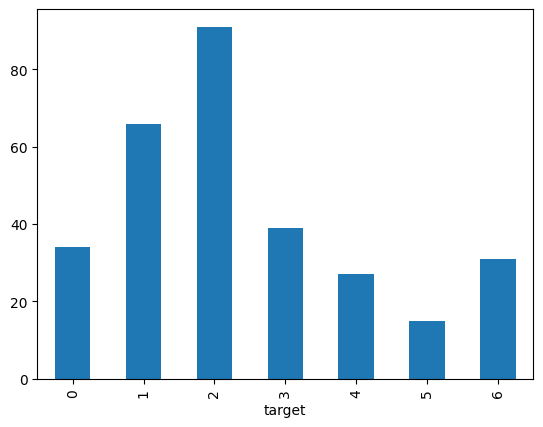

In [17]:
valid[valid.target != valid.pred_target].target.value_counts().reindex(range(7)).plot(kind='bar')

<Axes: xlabel='pred_target'>

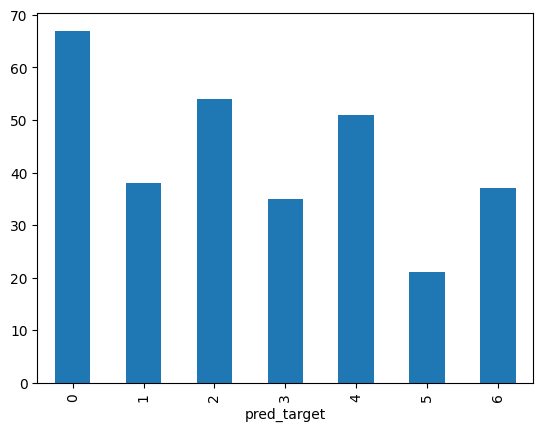

In [21]:
valid[valid.target != valid.pred_target].pred_target.value_counts().reindex(range(7)).plot(kind='bar')


### pred_label 전체 분포

<Axes: xlabel='pred_target'>

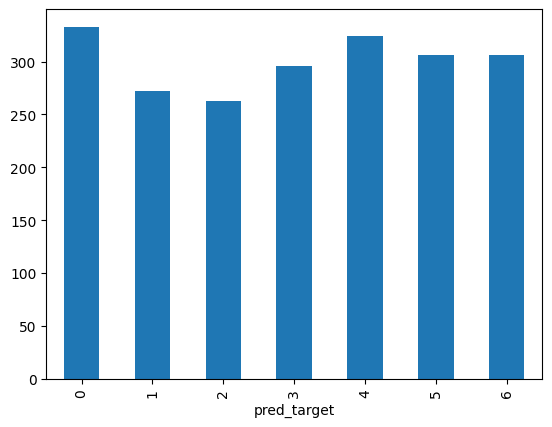

In [22]:
valid.pred_target.value_counts().reindex(range(7)).plot(kind='bar')


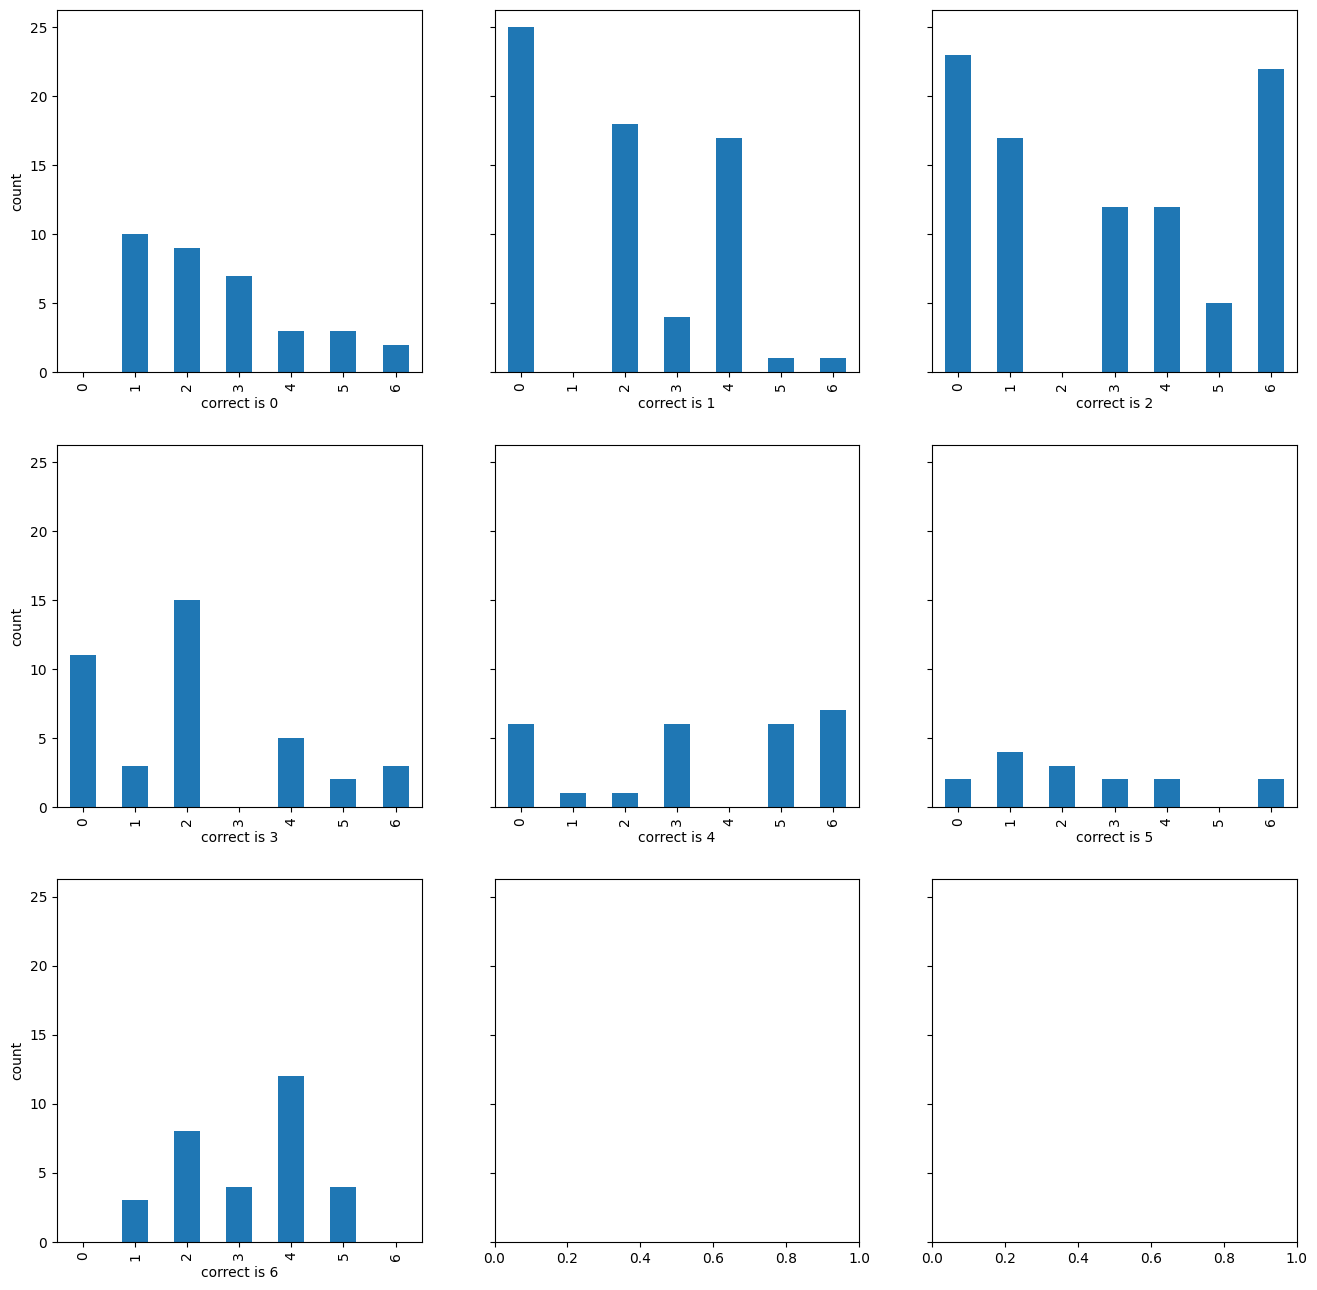

In [18]:
fig, axes =plt.subplots(3,3,figsize=(16,16),sharey='all')
axes =axes.flatten()
for i in range(7):
    valid[(valid.target != valid.pred_target) & (valid.target==i) ].pred_target.value_counts().reindex(range(7)).plot(kind='bar',ax=axes[i],xlabel=f'correct is {i}',ylabel='count')


In [19]:
valid[(valid.target != valid.pred_target) & (valid.target==2)]

,ID,text,target,url,date,pred_target
13,ynat-v1_train_05963,아파트 매각해 동국대에 2억원 기부한 부부,2,https://news.naver.com/main/read.nhn?mode=LS2D...,2020.12.30. 오전 11:22,1
35,ynat-v1_train_02096,홍세섭 영모도부터 김환기 서예까지…정동1928아트센터 개관전,2,https://news.naver.com/main/read.nhn?mode=LS2D...,2019.10.02. 오후 6:17,3
51,ynat-v1_train_03222,권칠승 상가임대료 현금 말고 카드로도 납부…법안 발의,2,https://news.naver.com/main/read.nhn?mode=LS2D...,2018.07.18. 오후 2:45,6
81,ynat-v1_train_02502,알뜰폰 공짜라더니… 노인 울리는 공짜폰 주의보,2,https://news.naver.com/main/read.nhn?mode=LS2D...,2016.05.17. 오전 6:20,0
87,ynat-v1_train_03673,부산소식 동서대 디자인대학 수업 작품 옥외광고전 수상,2,https://news.naver.com/main/read.nhn?mode=LS2D...,2020.09.14. 오후 4:11,3
...,...,...,...,...,...,...
1988,ynat-v1_train_05071,쌍용차 2018 국내영업본부 목표달성 전진대회 실시,2,https://news.naver.com/main/read.nhn?mode=LS2D...,2018.01.10. 오전 11:33,1
2070,ynat-v1_train_06109,한국 쩐 세계 디도스 공격 빠뤈 국까 파뤼종합,2,https://news.naver.com/main/read.nhn?mode=LS2D...,2018.07.02. 오전 11:27,5
2087,ynat-v1_train_01973,세종문화회관 인근 70대 분신…옆에 일본 무역보복 철회 메모종합,2,https://news.naver.com/main/read.nhn?mode=LS2D...,2019.08.01. 오후 1:58,4
2092,ynat-v1_train_00334,질의하는 윤한홍 의원,2,https://news.naver.com/main/read.nhn?mode=LS2D...,2019.10.15. 오후 3:34,6


In [20]:
valid[(valid.target != valid.pred_target) & (valid.target==2)].to_csv('../analysis/wrong2.csv',index=False)
